In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
###

import os 
path = './'
path_list = os.listdir(path)
namelist=['X_train','X_test','y_train','y_test']
dic_file={}
for i in namelist:
        strs=i
        filename=[s for s in path_list  if i in s]
        a='./'+i+'.csv'
        exec('i= a') 
        dic_file[strs]=pd.read_csv(i)
        
        
X_train=dic_file['X_train']
X_train.set_index(["Provider"], inplace=True)
X_test=dic_file['X_test']
X_test.set_index(["Provider"], inplace=True)

######################??????????#################

X_test.fillna(0,inplace=True)######

#################################################

y_train=dic_file['y_train']
y_test=dic_file['y_test'] 

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                     random_state = 0,class_weight='balanced',
                                     min_samples_split=50,oob_score=True,
                                     max_features='log2',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [4]:
from MetricPipeline import Metric_pipeline    

In [5]:
mp=Metric_pipeline(X_train,y_train,X_test,y_test,model)

roc_auc_score for the train dataset: 0.98


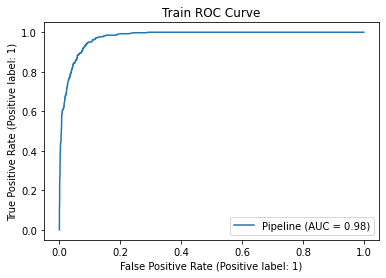

roc_auc_score for the test dataset: 0.93


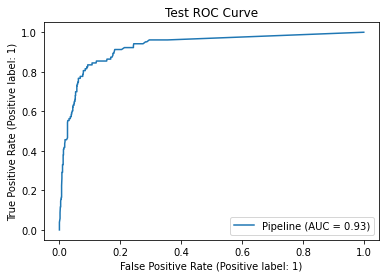

In [6]:
mp.roc_auc_score()

train PR-AUC is 0.83


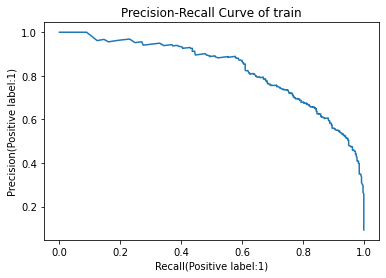

test PR-AUC is 0.63


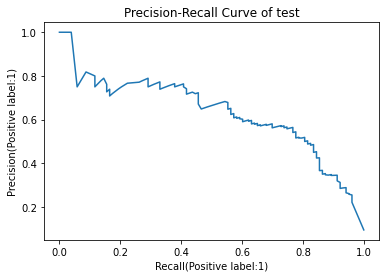

In [7]:
mp.PR_AUC()

In [8]:
mp.metrics()

,0,1
0,roc_auc_score(train),0.98
1,roc_auc_score(test),0.93
2,PR-AUC(train),0.83
3,PR-AUC(test),0.63
4,average_precision(train),0.83
5,average_precision(test),0.63
6,precision_score(train),0.95
7,precision_score(test),0.93


In [9]:
mp.classification_report()

---------------------Train Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3925
           1       0.54      0.93      0.68       403

    accuracy                           0.92      4328
   macro avg       0.76      0.92      0.82      4328
weighted avg       0.95      0.92      0.93      4328

---------------------Test Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       979
           1       0.47      0.83      0.60       103

    accuracy                           0.89      1082
   macro avg       0.72      0.87      0.77      1082
weighted avg       0.93      0.89      0.91      1082

